In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
data = pd.read_csv("CREMP_OCTO_Summaries_2023_MeanHeight.csv")

# Convert date
data["FirstOfDate"] = pd.to_datetime(data["FirstOfDate"], errors="coerce")

# Preview
print(data.head())
print(data.info())

   Year FirstOfDate subRegionID HabitatID  siteid     site_name  stationid  \
0  2011  2011-06-08          UK         P      32  Porter Patch        321   
1  2011  2011-06-08          UK         P      32  Porter Patch        322   
2  2011  2011-06-08          UK         P      32  Porter Patch        323   
3  2011  2011-06-08          UK         P      32  Porter Patch        324   
4  2011  2011-06-11          UK         P      33       Admiral        331   

   Eunicea_calyculata  Gorgonia_ventalina  Pseudopterogorgia_americana  \
0                 NaN                17.2                         23.8   
1                 8.0                26.7                         33.5   
2                19.8                20.0                         29.0   
3                11.6                26.5                         26.9   
4                 NaN                20.2                          8.0   

   Pseudopterogorgia_bipinnata  Eunicea_flexuosa  Pseudoplexaura_porosa  
0           

C:\Users\yunus\AppData\Local\Temp\ipykernel_12248\374992569.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_presence.index, y=species_presence.values, palette="crest")


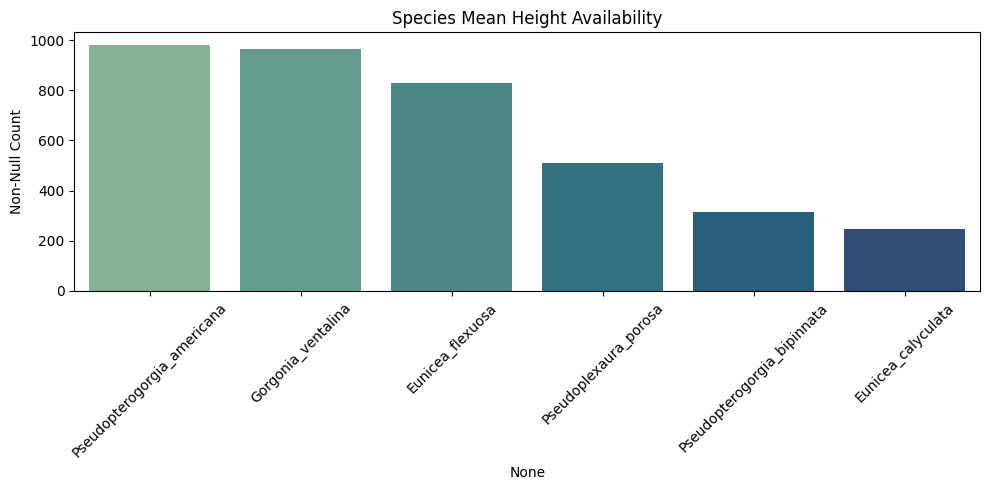

In [6]:
# ------------------------
# 🧬 1. Species Data Completeness
# ------------------------
species_cols = data.columns[7:]

species_presence = data[species_cols].notna().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=species_presence.index, y=species_presence.values, palette="crest")
plt.title("Species Mean Height Availability")
plt.ylabel("Non-Null Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

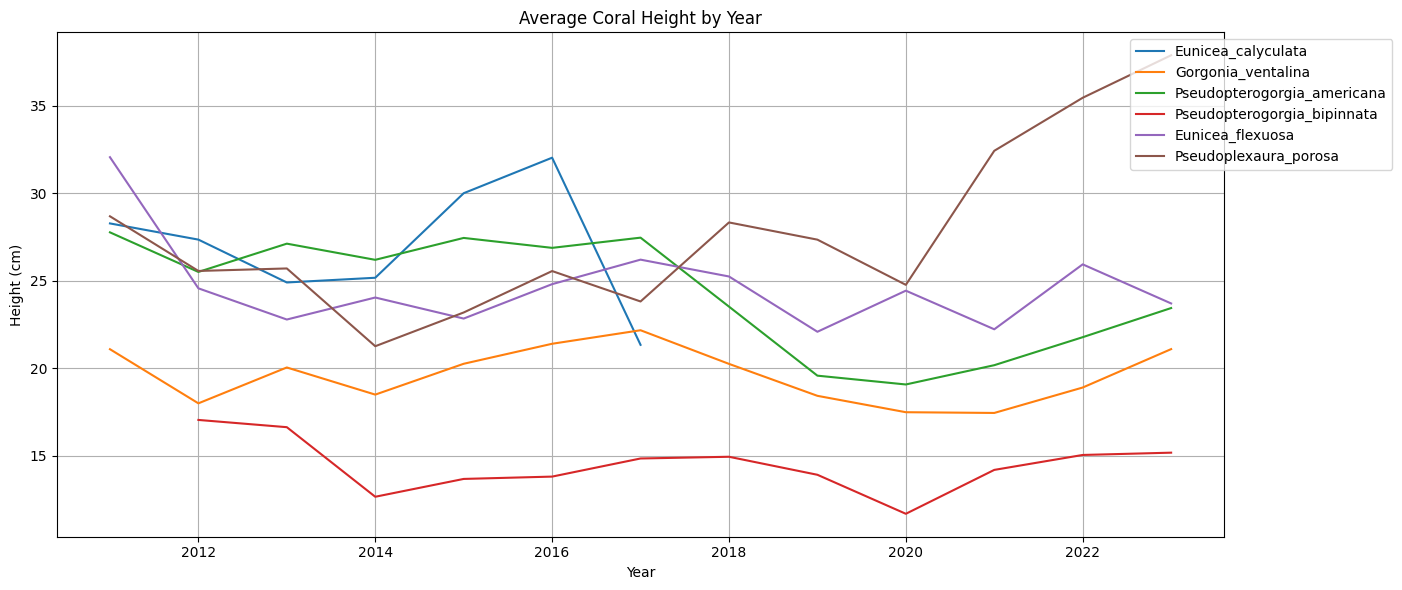

In [8]:
# ------------------------
# 🌿 2. Mean Height Over Time
# ------------------------
avg_height_by_year = data.groupby("Year")[species_cols].mean()

plt.figure(figsize=(14, 6))
for species in avg_height_by_year.columns:
    plt.plot(avg_height_by_year.index, avg_height_by_year[species], label=species)

plt.title("Average Coral Height by Year")
plt.ylabel("Height (cm)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

C:\Users\yunus\AppData\Local\Temp\ipykernel_12248\4226391116.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted, x="Year", y="MeanHeight", hue="subRegionID", ci=None)


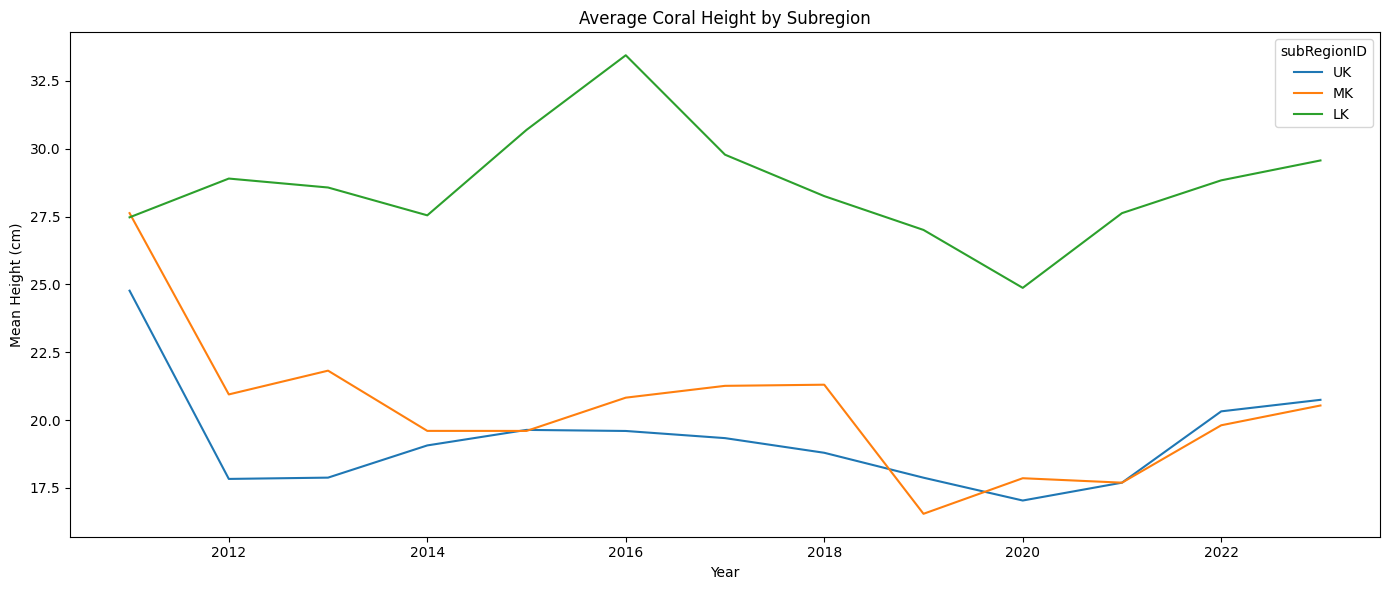

C:\Users\yunus\AppData\Local\Temp\ipykernel_12248\4226391116.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted, x="Year", y="MeanHeight", hue="HabitatID", ci=None)


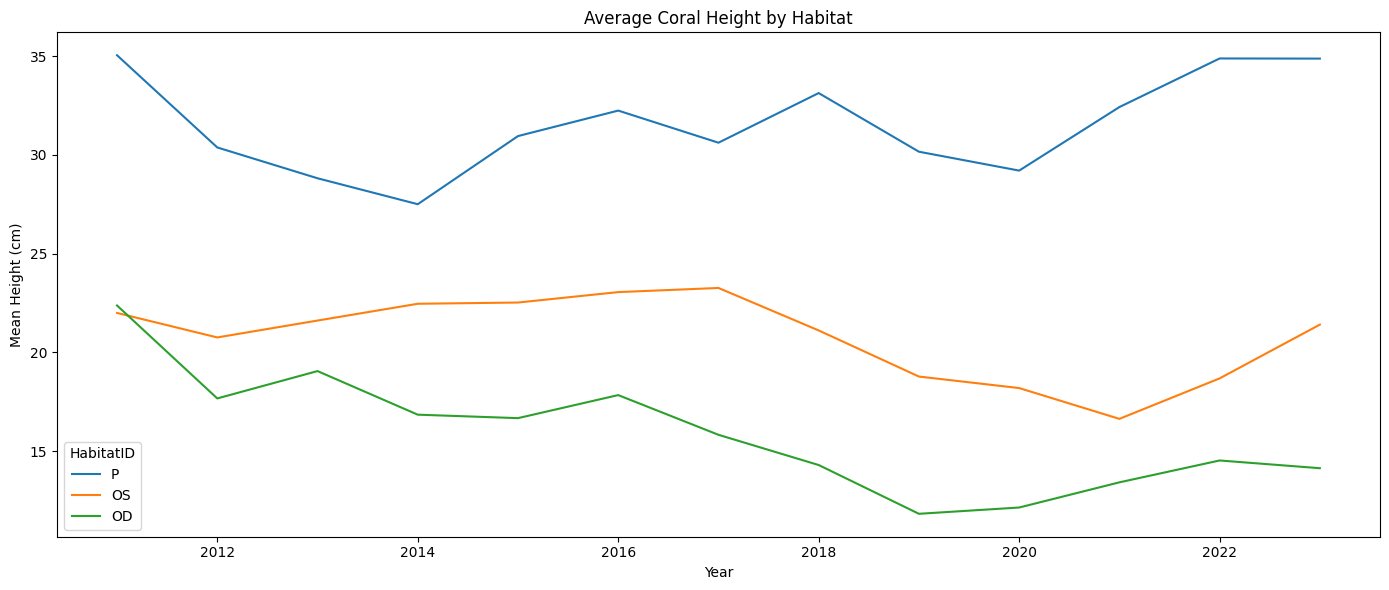

In [10]:
# ------------------------
# 📍 3. Coral Height by Subregion and Habitat
# ------------------------
melted = data.melt(id_vars=["Year", "subRegionID", "HabitatID"], 
                   value_vars=species_cols,
                   var_name="Species", value_name="MeanHeight")

# Subregion
plt.figure(figsize=(14, 6))
sns.lineplot(data=melted, x="Year", y="MeanHeight", hue="subRegionID", ci=None)
plt.title("Average Coral Height by Subregion")
plt.ylabel("Mean Height (cm)")
plt.tight_layout()
plt.show()

# Habitat
plt.figure(figsize=(14, 6))
sns.lineplot(data=melted, x="Year", y="MeanHeight", hue="HabitatID", ci=None)
plt.title("Average Coral Height by Habitat")
plt.ylabel("Mean Height (cm)")
plt.tight_layout()
plt.show()

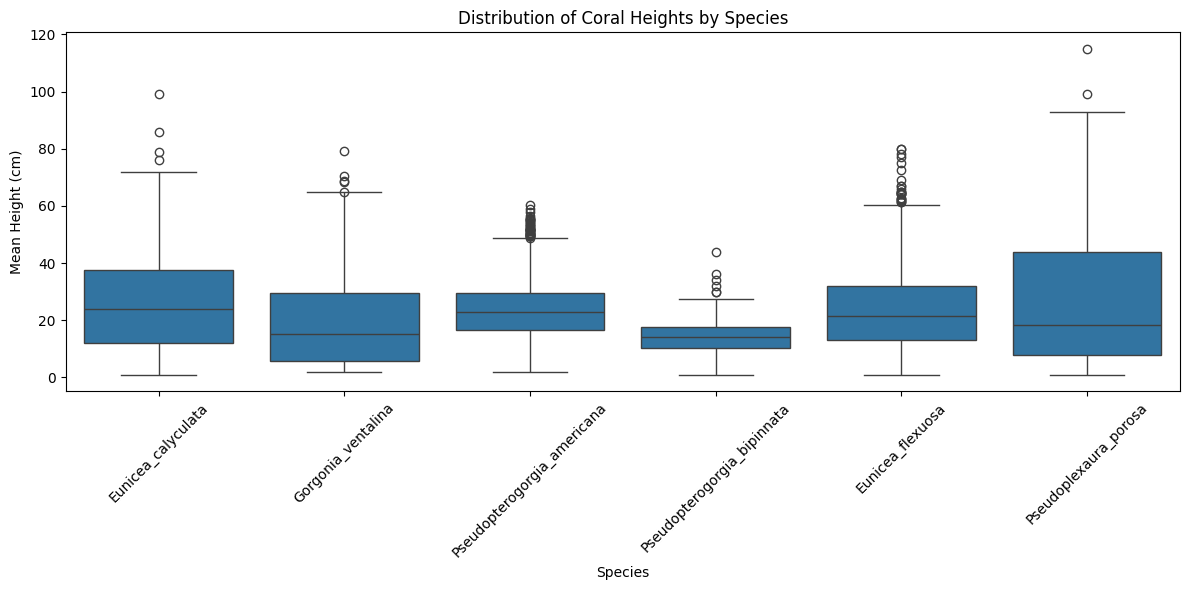

In [12]:
# ------------------------
# 📊 4. Coral Height Distribution by Species
# ------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x="Species", y="MeanHeight")
plt.title("Distribution of Coral Heights by Species")
plt.ylabel("Mean Height (cm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

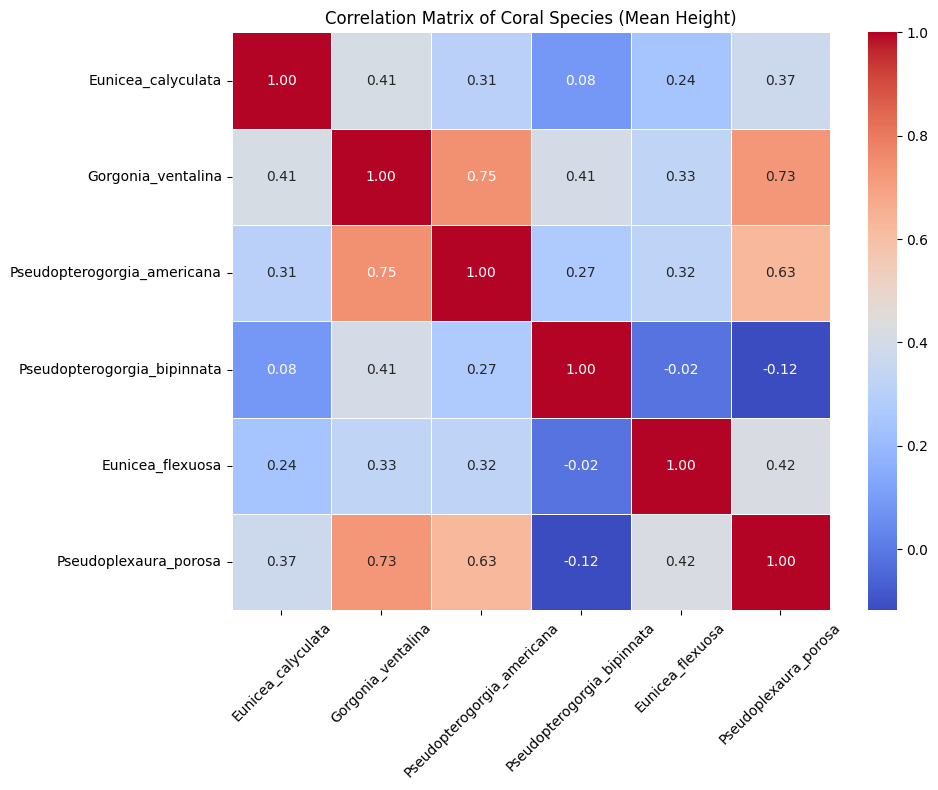

In [16]:
# ------------------------
# 🔗 5. Correlation Between Species (Mean Height)
# ------------------------

# Compute pairwise correlation
corr_matrix = data[species_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Coral Species (Mean Height)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
corr_matrix

,Eunicea_calyculata,Gorgonia_ventalina,Pseudopterogorgia_americana,Pseudopterogorgia_bipinnata,Eunicea_flexuosa,Pseudoplexaura_porosa
Eunicea_calyculata,1.000000,0.413893,0.309225,0.082924,0.240747,0.371401
Gorgonia_ventalina,0.413893,1.000000,0.745978,0.405518,0.329069,0.727206
Pseudopterogorgia_americana,0.309225,0.745978,1.000000,0.271523,0.323183,0.628219
Pseudopterogorgia_bipinnata,0.082924,0.405518,0.271523,1.000000,-0.015749,-0.118415
Eunicea_flexuosa,0.240747,0.329069,0.323183,-0.015749,1.000000,0.419605
Pseudoplexaura_porosa,0.371401,0.727206,0.628219,-0.118415,0.419605,1.000000
